In [2]:
# STEP 1
import yfinance as yf

In [10]:
# STEP 2
# Download Apple stock data from 2018 to 2024
data = yf.download("AAPL", start="2018-01-01", end="2024-01-01")



# show five rows
print(data.head())

/tmp/ipython-input-265/148028544.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2018-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.304165  40.313526  39.602246  39.812824  102223600
2018-01-03  40.297173  40.839992  40.234002  40.367365  118071600
2018-01-04  40.484341  40.587289  40.262067  40.369693   89738400
2018-01-05  40.945263  41.031832  40.489016  40.580266   94640000
2018-01-08  40.793179  41.087983  40.694907  40.793179   82271200


In [12]:
# STEP 3
# Data preprocessing
# Check for missing values
print(data.isnull().sum())

data = data.dropna()  # Remove missing values

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [13]:
# STEP 4
# Select Features (X) and Target (y)
# Features → Open, High, Low, Volume
# Target → Close


X=data[['Open','High','Low','Volume']]
y=data['Close']

In [14]:
# STEP 5
# Train-Test Split (Time Series style)

train_size = int(len(data) * 0.8)

X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

In [15]:
# STEP 6
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)  # Train model using training data

LinearRegression()

In [16]:
# STEP 7
# Predict Stock Price

y_pred=model.predict(X_test)

In [17]:
 # STEP 8: Evaluate Model
from sklearn .metrics import mean_absolute_error ,mean_squared_error,r2_score
import numpy as np
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.6712524423585208
RMSE: 0.8477984456786717
R2 Score: 0.9981112521563101


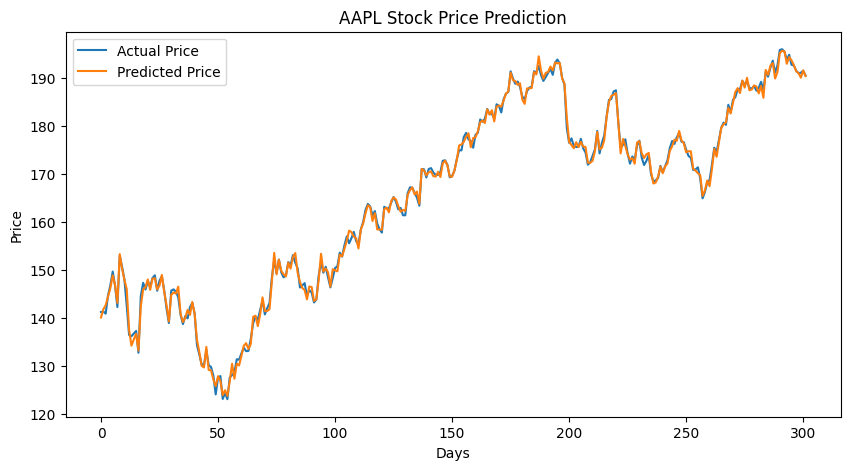

In [18]:
# Step 9: Plot Actual vs Predicted Price
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(y_pred, label="Predicted Price")
plt.title("AAPL Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()